# Day 2 - Familiarise with scholarly data

## Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

## Load conference data

The datasets used here comes from the paper https://content.iospress.com/articles/data-science/ds190015 and are about three conferences the International Semantic Web Conference (ISWC), The European Conference on Semantic Web (ESWC), and the International Conference on Theory and Practice of Digital Libraries (TPDL).

These have been extracted from Springer Nature Scigraph (apparently the website does not work anymore, https://www.springernature.com/gp/researchers/scigraph).

In SciGraph they were assigned conference series identifiers from DBLP (i.e., semweb, esws and ercimdl, respectively), so I extracted them from a bigger dataset thanks to these keywords.

Let's load them directly.


In [2]:
iswc = pd.read_csv('../data/raw/iswc_enhanced.csv', dtype=object)
iswc['author_order'] = pd.to_numeric(iswc['author_order'])

eswc = pd.read_csv('../data/raw/eswc_enhanced.csv', dtype=object)
eswc['author_order'] = pd.to_numeric(eswc['author_order'])

tpdl = pd.read_csv('../data/raw/tpdl_enhanced.csv', dtype=object)
tpdl['author_order'] = pd.to_numeric(tpdl['author_order'])


Let me fix the data for you first

In [3]:
iswc.loc[iswc.book_doi == '10.1007/978-3-319-25010-6', 'conf_city'] = 'Bethlehem'
iswc.loc[iswc.book_doi == '10.1007/978-3-319-25010-6', 'conf_country'] = 'United States'

iswc.loc[iswc.book_doi == '10.1007/978-3-319-25007-6', 'conf_city'] = 'Bethlehem'
iswc.loc[iswc.book_doi == '10.1007/978-3-319-25007-6', 'conf_country'] = 'United States'

iswc.loc[iswc.book_doi == '10.1007/978-3-540-76298-0', 'conf_city'] = 'Busan'
iswc.loc[iswc.book_doi == '10.1007/978-3-540-76298-0', 'conf_country'] = 'South Korea'

iswc.loc[iswc.conf_country == 'USA', 'conf_country'] = 'United States'

All the dataframes follow the same structure. Check the columns.

Check how a generic record looks like

OK. Let's see ISWC first

In [4]:
iswc.describe(include='all')

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
count,4028,4028,4028,4028,4028,4028,4028.000000,4028,4028,3841,...,3725,3851,3851,4011,4028,4028,4028,4028,4028,4028
unique,1056,1,3,3,16,9,NaN,1501,1949,449,...,272,44,46,915,1056,23,16,23,2,14
top,10.1007/978-3-540-30581-1_4,semweb,ISWC,International Semantic Web Conference,Kobe,United States,NaN,Michael,Wang,grid.5379.8,...,Amsterdam,United States,US,University of Manchester,Bringing Semantics to Web Services: The OWL-S ...,10.1007/11926078,The Semantic Web ? ISWC 2016,"5th International Semantic Web Conference, ISW...",OpenAccess,2005-01-01
freq,30,4028,3924,3924,340,1467,NaN,43,47,145,...,175,772,772,85,30,309,340,309,2115,389
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.978898,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.380348,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, let's double check this conference series.

In [5]:
iswc['conf_acronym'].unique()

array(['ISWC', 'SWSWPC', 'SWDB'], dtype=object)

Ah... it looks like there are different acronyms here. Check if they are indeed the conference you need.

In [6]:
iswc[iswc.conf_acronym == 'SWSWPC'].head(1)['conf_name'].values

array(['International Workshop on Semantic Web Services and Web Process Composition'],
      dtype=object)

Check the other as well.

Ok, we have intruders here. Let's drop them.

In [7]:
iswc = iswc.drop(iswc[iswc.conf_acronym != 'ISWC'].index)

In [8]:
iswc.describe(include='all')

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
count,3924,3924,3924,3924,3924,3924,3924.000000,3924,3924,3739,...,3623,3749,3749,3907,3924,3924,3924,3924,3924,3924
unique,1028,1,1,1,14,8,NaN,1470,1916,441,...,264,44,46,896,1028,21,14,21,2,14
top,10.1007/978-3-319-25010-6_12,semweb,ISWC,International Semantic Web Conference,Kobe,United States,NaN,Michael,Wang,grid.5379.8,...,Amsterdam,United States,US,University of Manchester,Building and Using a Knowledge Graph to Combat...,10.1007/11926078,The Semantic Web ? ISWC 2016,"5th International Semantic Web Conference, ISW...",OpenAccess,2016-01-01
freq,23,3924,3924,3924,340,1406,NaN,42,47,145,...,175,717,717,85,23,309,340,309,2115,340
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.358169,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Onto ESWC now

In [9]:
eswc['conf_acronym'].unique()

array(['ESWC', 'ESWS'], dtype=object)

Check the other acronym just to be sure

Ah! That's ok! This was the name of the conference before it was a conference.

In [10]:
eswc.describe(include='all')

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
count,4224,4224,4224,4224,4224,4224,4224.000000,4224,4224,4076,...,3858,4083,4085,4224,4224,4224,4224,4224,3485,4224
unique,1141,1,2,4,8,5,NaN,1561,2176,511,...,293,54,54,961,1140,22,10,22,2,13
top,10.1007/978-3-642-41242-4_48,esws,ESWC,European Semantic Web Conference,"Heraklion, Crete",Greece,NaN,Thomas,Motta,grid.6142.1,...,Karlsruhe,Germany,DE,The Open University,Optique: OBDA Solution for Big Data,10.1007/978-3-319-11955-7,The Semantic Web: Research and Applications,"ESWC 2014 Satellite Events, Anissaras, Crete, ...",OpenAccess,2015-01-01
freq,23,4224,4103,1899,1656,2646,NaN,45,21,133,...,150,939,939,123,23,334,1814,334,1787,630
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.826231,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.228295,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, let's check TPDL

In [11]:
tpdl['conf_acronym'].unique()

array(['TPDL', 'ECDL'], dtype=object)

Check ECDL 

Let me fix this date for you. I know it was wrong.

In [12]:
tpdl.loc[tpdl.year == '2014-01-01', 'year'] = '2013-01-01'

In [13]:
tpdl.describe(include='all')

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
count,3271,3271,3271,3271,3271,3271,3271.000000,3271,3271,3208,...,2991,3216,3216,3261,3271,3271,3271,3271,3168,3271
unique,919,1,2,1,14,11,NaN,1382,1736,485,...,280,52,52,867,893,16,3,15,2,14
top,10.1007/978-3-319-14226-5_4,ercimdl,ECDL,International Conference on Theory and Practic...,Valletta,Malta,NaN,Michael,Fox,grid.438526.e,...,Athens,United States,US,Virginia Tech,Understanding Climate Data Through Commentary ...,10.1007/978-3-642-15464-5,Research and Advanced Technology for Digital L...,"14th European Conference, ECDL 2010, Glasgow, ...",Restricted,2013-01-01
freq,23,3271,1981,3271,466,466,NaN,36,26,93,...,92,607,607,77,46,309,2835,309,3134,466
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.747784,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.922260,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis

For the sake of simplicity, we can create a variable `df` and assign one of our dataframes `iswc`, `eswc`, `tpdl` to it.

Pick one for the moment. Later, you can come up here, switch to another dataframe and run again the cells below.

In [14]:
df = iswc

In [15]:
df_first = df[df.author_order == 1]
df_last_authors_idx = df.groupby('paper_doi')['author_order'].transform(max) == df['author_order']
df_last = df[df_last_authors_idx]
df_middle = df[df_last_authors_idx.map(lambda x: not x)]
df_middle = df_middle[df_middle.author_order != 1]

In [16]:
df[df.paper_doi == '10.1007/11926078_12']

,paper_doi,conf_seriesId,conf_acronym,conf_name,conf_city,conf_country,author_order,author_givenName,author_familyName,org_gridId,...,org_city,org_country,org_countrycode,affiliationString,paper_title,book_doi,book_title,book_confSubtitle,rights,year
0,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,4,Ryan,Lee,NaN,...,NaN,NaN,NaN,(World Wide Web Consortium),Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01
637,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,2,Christian,Bizer,grid.14095.39,...,Berlin,Germany,DE,Freie Universität Berlin,Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01
980,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,1,Emmanuel,Pietriga,grid.464180.f,...,Gif-sur-Yvette,France,FR,INRIA & Laboratoire de Recherche en Informatiq...,Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01
1414,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,3,David,Karger,grid.116068.8,...,Cambridge,United States,US,MIT CSAIL,Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01
1415,10.1007/11926078_12,semweb,ISWC,International Semantic Web Conference,"Athens, GA",United States,4,Ryan,Lee,grid.116068.8,...,Cambridge,United States,US,MIT CSAIL,Fresnel: A Browser-Independent Presentation Vo...,10.1007/11926078,The Semantic Web - ISWC 2006,"5th International Semantic Web Conference, ISW...",OpenAccess,2006-01-01


In [17]:
df.book_confSubtitle.unique()

array(['5th International Semantic Web Conference, ISWC 2006, Athens, GA, USA, November 5-9, 2006, Proceedings',
       'Second International Semantic Web Conference, Sanibel Island, FL, USA, October 20-23, 2003, Proceedings',
       '11th International Semantic Web Conference, Boston, MA, USA, November 11-15, 2012, Proceedings, Part I',
       '14th International Semantic Web Conference, Bethlehem, PA, USA, October 11-15, 2015, Proceedings, Part I',
       '15th International Semantic Web Conference, Kobe, Japan, October 17?21, 2016, Proceedings, Part I',
       '11th International Semantic Web Conference, Boston, MA, USA, November 11-15, 2012, Proceedings, Part II',
       '10th International Semantic Web Conference, Bonn, Germany, October 23-27, 2011, Proceedings, Part II',
       '7th International Semantic Web Conference, ISWC 2008, Karlsruhe, Germany, October 26-30, 2008, Proceedings',
       '9th International Semantic Web Conference, ISWC 2010, Shanghai, China, November 7-11, 2

**Task:** which countries did the conference visit?

**Task:** any country multiple times? Can you do a bar plot?

**Task:** which cities?

**Task:** Find the top-10 researcher by number of papers published

**Task:** Find the top-10 researcher by number of papers published (in last position)

**Task:** Find the top-10 researcher by number of papers published (in first position)

Do you see any notable inversion?

**Task:** Find and plot the total number of contributions per year

**Task:** Find and plot the same just with grid.id attached (i.e., with an organisation explicitly attached)

**Task:** Find and plot the same just without grid.id attached

For clarity, these can go in the same plot.

<AxesSubplot:xlabel='year'>

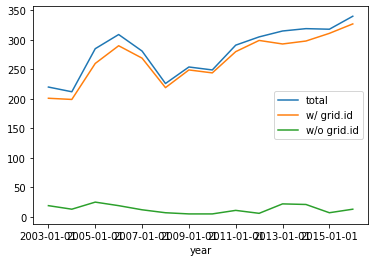

In [18]:
fig, ax = plt.subplots()

df.groupby(['year'])['paper_doi'].count().reset_index().plot.line(x='year', y='paper_doi', ax=ax, label='total')
df[df['org_gridId'].notna()].groupby(['year'])['paper_doi'].count().reset_index().plot.line(x='year', y='paper_doi', ax=ax, label='w/ grid.id')
df[df['org_gridId'].isna()].groupby(['year'])['paper_doi'].count().reset_index().plot.line(x='year', y='paper_doi', ax=ax, label='w/o grid.id')

In plotly, to have an interactive plot, it would be like this.

In [19]:
contributions = df.groupby(['year'])['paper_doi'].count()
contributions_with_gridId = df[df['org_gridId'].notna()].groupby(['year'])['paper_doi'].count()
contributions_without_gridId = df[df['org_gridId'].isna()].groupby(['year'])['paper_doi'].count()

trace1 = go.Scatter(x=contributions.index,
                    y=contributions.values,
                    name='contributions',
                    marker=dict(symbol='circle', size=8),
                    mode='lines+markers')
                    
trace2 = go.Scatter(x=contributions_with_gridId.index,
                    y=contributions_with_gridId.values,
                    name='contributions (w/ gridID)',
                    marker=dict(symbol='cross', size=8),
                    mode='lines+markers')

trace3 = go.Scatter(x=contributions_without_gridId.index,
                    y=contributions_without_gridId.values,
                    name='contributions (w/o gridID)',
                    marker=dict(symbol='triangle-up', size=8),
                    mode='lines+markers')
                    
layout = go.Layout(title='Trends of contributions',
                   legend=dict(orientation='h'))

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
plotly.offline.iplot(fig)

**Task:** Find and plot the trend of PIDs (i.e., DOIs and grid.ids) per year

**Task:** Find and plot the distribution of papers by country

**Task:** Find and plot the number of papers by country (overall, first authors, last authors). 

We can also plot as a pie chart

In [20]:
dois = df.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()
dois_first = df_first.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()
dois_last = df_last.groupby(['org_countrycode'])['paper_doi'].nunique().reset_index()

pie_1 = go.Pie(values=dois['paper_doi'],
              labels=dois['org_countrycode'],
              textposition='inside',
              domain=dict(x=[0, 1], y=[.4, 1]),
              name='DOIs',
              hoverinfo='label+value+name',
              hole=.4)

pie_2 = go.Pie(values=dois_first['paper_doi'],
              labels=dois_first['org_countrycode'],
              textposition='inside',
              domain=dict(x=[0, .5], y=[0, .6]),
              name='DOIs',
              hoverinfo='label+value+name',
              hole=.4)

pie_3 = go.Pie(values=dois_last['paper_doi'],
              labels=dois_last['org_countrycode'],
              textposition='inside',
              domain=dict(x=[.5, 1], y=[0, .6]),
              name='DOIs',
              hoverinfo='label+value+name',
              hole=.4)

tris_donut = go.Layout(title='DOI breakdown by country',
                       annotations=[dict(font=dict(size=15),
                                        showarrow=False,
                                        text='All authors',
                                        x=.5, y=1.07),
                                    dict(font=dict(size=15),
                                        showarrow=False,
                                        text='1st authors',
                                        x=.18, y=-0.07),
                                    dict(font=dict(size=15),
                                        showarrow=False,
                                        text='Last authors',
                                        x=.83, y=-0.07)])

fig = go.Figure(data=[pie_1,pie_2,pie_3], layout=tris_donut)
plotly.offline.iplot(fig)

**Task:** Can you do the same plots above aggregating by organisations this time?

**Task:** Are there institutions that never appear in first or last position? Check year by year.

Hint: `df_first.groupby(['year']).agg({'org_gridId': set})` aggregates a set of organizations

**Task:** Can you find the average number of authors collaborating over the years?

**Task:** Can you find the average number of organisations collaborating over the years?